In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
dataset = pd.read_csv("/kaggle/input/stock-market-dataset/enhanced_stock_dataset.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Columns: 221 entries, Date to corr_4_5
dtypes: float64(216), int64(4), object(1)
memory usage: 4.3+ MB


In [4]:
dataset.columns

Index(['Date', 'return_1', 'open_1', 'high_1', 'low_1', 'close_1',
       'adjusted_1', 'volume_1', 'return_2', 'open_2',
       ...
       'corr_1_2', 'corr_1_3', 'corr_1_4', 'corr_1_5', 'corr_2_3', 'corr_2_4',
       'corr_2_5', 'corr_3_4', 'corr_3_5', 'corr_4_5'],
      dtype='object', length=221)

In [5]:
data_features = ['volume_1', 'volatility_1', 'rsi_1','macd_1']
target = 'return_1'

In [6]:
#filtered dataset
stock_market_dataset = dataset[data_features +[target]].dropna()
stock_market_dataset

,volume_1,volatility_1,rsi_1,macd_1,return_1
0,593600,0.031718,51.458714,0.000000,0.014057
1,825000,0.031718,51.458714,0.036695,0.008072
2,1053500,0.031718,51.458714,0.234143,0.036902
3,1289100,0.031718,51.458714,0.535345,0.031392
4,1549400,0.031718,51.458714,0.856168,0.018555
...,...,...,...,...,...
2564,1029500,0.027396,36.378183,-11.597677,0.020397
2565,1255700,0.027641,28.818665,-11.312854,-0.029837
2566,1390600,0.027945,33.406588,-10.832348,0.009785
2567,1228000,0.028411,34.957066,-10.119446,0.016071


In [7]:
print(dataset[data_features].dtypes)

volume_1          int64
volatility_1    float64
rsi_1           float64
macd_1          float64
dtype: object


In [8]:
x = stock_market_dataset[data_features]
y = stock_market_dataset[target]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =.2, 
                                                   random_state = 42)

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
prediction = model.predict(x_test)
prediction

array([ 1.36760191e-02,  5.32157640e-03, -3.90160637e-03,  7.94750668e-04,
        7.51155782e-03, -2.31362442e-03,  8.94971378e-03, -1.85417675e-04,
       -7.66790677e-04,  1.43706623e-02, -8.90401486e-03,  5.70685445e-04,
       -8.78415766e-03,  1.02654035e-03,  9.10987985e-03, -1.24886063e-02,
       -4.24760050e-03,  1.18037337e-02,  7.45972350e-03, -3.59658655e-03,
       -1.38101082e-02, -5.18949352e-03,  1.15219171e-02,  4.85593484e-03,
       -1.69646866e-02,  1.18483434e-02,  3.02972635e-03,  6.05959395e-03,
        4.07924585e-03, -1.44927975e-02,  8.82588217e-03,  1.00177858e-02,
       -4.12903197e-04, -7.01728808e-03, -6.62171580e-03,  3.85766889e-03,
        7.94694747e-04,  5.54015255e-03, -6.55579834e-03,  2.39293782e-03,
       -2.91941749e-03, -1.13219019e-02, -5.39268496e-03, -5.50114098e-03,
       -9.74037710e-03,  1.94934730e-02,  3.10736031e-03,  2.37782022e-03,
       -3.51947147e-03,  1.08189587e-03,  3.99079088e-03,  4.25622951e-03,
        1.05156922e-02, -

In [14]:
model.coef_

array([-2.46877572e-09,  7.21417034e-02,  5.62353319e-04, -3.98999502e-04])

In [15]:
model.intercept_

-0.02876910989443271

In [21]:
from sklearn.metrics import r2_score,mean_squared_error
r2 =r2_score(y_test, prediction)
mse =mean_squared_error(y_test, prediction)
print('R squre error: ',r2)
print('Mean Squred error: ',mse)


R squre error:  0.06398059365577646
Mean Squred error:  0.0009451199717010509


In [23]:
equation = 'return_1'
for coef, features in zip(model.coef_, data_features):
    equation += f"{coef:0.5f} * {features}+"

equation += f"{model.intercept_:0.5f}"
equation

'return_1-0.00000 * volume_1+0.07214 * volatility_1+0.00056 * rsi_1+-0.00040 * macd_1+-0.02877'

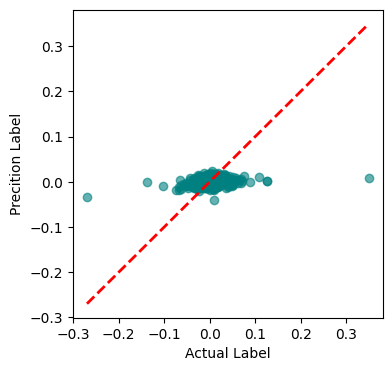

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (4, 4))
plt.scatter(y_test, prediction, color = "teal", alpha = 0.6)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--', linewidth = 2) # line lower and upper segment
plt.xlabel("Actual Label")
plt.ylabel('Precition Label')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


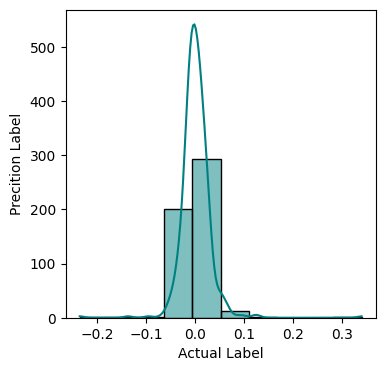

In [27]:
residualsError= y_test - prediction
plt.figure(figsize = (4, 4))
sns.histplot(residualsError, kde=True, color = "teal", bins = 10)

plt.xlabel("Actual Label")
plt.ylabel('Precition Label')
plt.show()